Your objective in this exam option is to train a classifier to distinguish among musical instruments. <a href = "https://en.wikipedia.org/wiki/Overtone">Wikipedia</a> explains why different musical instruments sound different, even when they play the same note:

"Most oscillators, from a guitar string to a flute, will naturally vibrate at a series of distinct frequencies known as normal modes. The lowest normal mode frequency is known as the fundamental frequency, while the higher frequencies are called overtones. Often, when an oscillator is excited by, for example, plucking a guitar string, it will oscillate at several of its modal frequencies at the same time. So when a note is played, this gives the sensation of hearing other frequencies (overtones) above the lowest frequency (the fundamental).

Timbre is the quality that gives the listener the ability to distinguish between the sound of different instruments. The timbre of an instrument is determined by which overtones it emphasizes. That is to say, the relative volumes of these overtones to each other determines the specific "flavor" or "color" of sound of that family of instruments...."

You're going to take the FFT of the sound data, extract the powers of overtones relative to the fundamental, and use those as features to train and test a classifier.

Before you start, store the absolute path to <tt>trumpet_C4_1_forte_normal.wav</tt> and <tt>oboe_C4_1_forte_normal.wav</tt> to variables, like:

In [54]:
trumpet = r"C:\Users\Lenovo\Desktop\pic16\Final Exam practice\Exam Download\Exam Download\Part I - Track A - Option 2 Files\Trumpet\trumpet_C4_1_forte_normal.wav"
oboe = r"C:\Users\Lenovo\Desktop\pic16\Final Exam practice\Exam Download\Exam Download\Part I - Track A - Option 2 Files\Oboe\oboe_C4_1_forte_normal.wav"

You can get the absolute path of a file by holding the shift key while you right click the file, then select "Copy as path".
I found it important to store the paths as raw strings (preceeded with <tt>r</tt> outside the quote).

1) Begin by writing a function <tt>getData(filename)</tt> that opens the file with path <tt>filename</tt> and returns the data <i>along with a corresponding array of time points</i>, determined based on the sampling frequency. (Assume time starts at 0.)

Use it to load <tt>trumpet_C4_1_forte_normal.wav</tt> and plot the sound signal against time (in seconds, not samples) using <tt>matplotlib</tt>.  

In [2]:
# remember this line
%matplotlib inline

(105984L,) (105984L,)
0.000377419020032


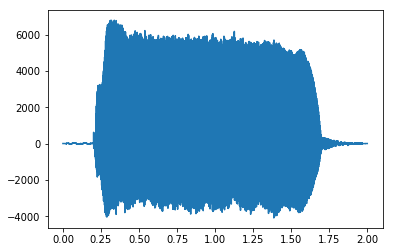

In [57]:
from scipy.io import wavfile as wv
import matplotlib.pyplot as plp
import numpy as np
import scipy.fftpack as scifft

def getData(filename):
    rate, data = wv.read(filename)
    timepts = np.linspace(0,2,data.shape[0])
    return timepts, data
timepts, data = getData(trumpet)
print data.shape, timepts.shape
print timepts[20]
plp.plot(timepts, data)

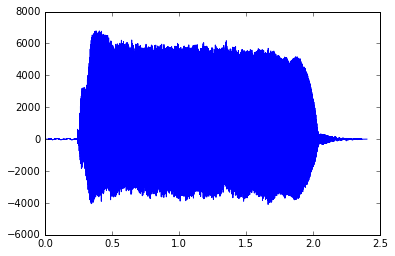

The plot looks like a solid blob rather than a wavy line. That's because there are many oscillations and the minimum thickness of a line is a pixel. You can still see some important information about the sound file, though. From this view, you can see a short (about 0.25s) period of silence at the beginning, the main part of the note, and some quiet sound at the end. This is typical of all the provided sound files.

2) We're not interested in the frequencies of the silence at the beginning or the quiet sound at the end. Really, we only need to get the frequencies from the main part of the note. And actually, we only need a short portion of the note to determine which instrument is playing. So you're going to write a function to extract a short segment from the middle of the sound file.

Write a function <tt>get_middle(x,N)</tt> that extracts <tt>N</tt> data points from the center of a 1D array <tt>x</tt>. It's OK to write the code assuming that <tt>N</tt> and the length of <tt>x</tt> are both even, if it helps. (If one or both are odd, it's OK for the data to be off-center by a sample or so.)

Test it by extracting and plotting the middle 500 samples and time points from the trumpet data.

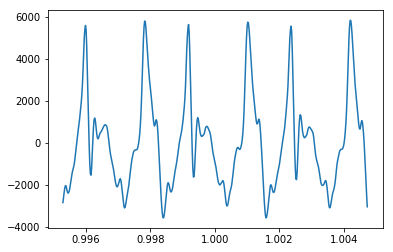

In [25]:
def get_middle(x, N):
    midpt = x.shape[0]/2.0
    min_from_mid = int(midpt-(N/2.0))
    max_from_mid = int(midpt+(N/2.0))
    return np.linspace(timepts[min_from_mid], timepts[max_from_mid], N), x[min_from_mid:max_from_mid]

t,k = get_middle(data, 500)
plp.plot(t, k)

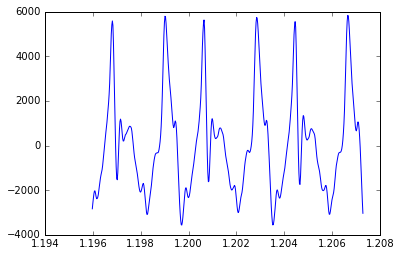

You should see a periodic waveform from 1.196s to 1.208s. At first glance, the period might look like it is about 0.002s based on the peaks, but upon closer inspection, it should be clear that the period is actually double that, about 0.004s. (That is, the fundamental frequency is approximately 250Hz.)

3) Now extract the middle 10000 samples from the original file. Take the FFT and get the corresponding frequencies, which should range from approximately -22000Hz to nearly 22000 Hz. Plot the magnitude of the FFT (the power) against the corresponding frequencies from 0Hz to 4000 Hz.

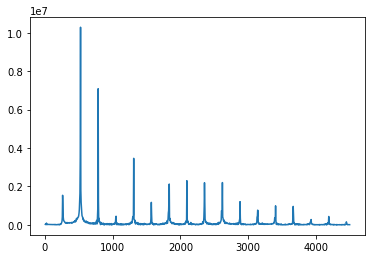

In [55]:
_,data = get_middle(data, 10000)


trump_fft = scifft.fft(data)

freqs = scifft.fftfreq(len(data), d= 1.0/rate) 
trump_fft2 = trump_fft.copy()
trump_fft2 = np.abs(trump_fft2)
mask = np.logical_and(freqs>0, freqs < 4500)
plp.plot(freqs[mask], trump_fft2[mask])

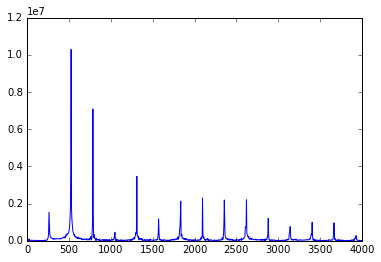

Some explanation of what you should see, also from Wikipedia (emphasis mine):
"A driven non-linear oscillator, such as the vocal folds, a blown wind instrument, or a bowed violin string (but not a struck guitar string or bell) will oscillate in a periodic, non-sinusoidal manner. This generates the impression of sound at <i>integer multiple frequencies of the fundamental known as harmonics</i>...."

The file name begins with "trumpet_C4" because it is the note known as "C4" being played by the trumpet. C4 has a frequency of 261.6 Hz. You should see this <i>fundamental</i> frequency as the first (far left) well-defined peak in your plot. Note the peaks at integer multiples of the fundamental; these are the <i>harmonics</i>. Be sure that you understand what is meant by "fundamental" and "harmonics" before you proceed. 

Isn't it interesting that the powers of some harmonics are higher than that of the fundamental, yet our ears still recognize the note as the fundamental (C4)?

You might want to produce an equivalent plot for the oboe before proceeding. If you do, you'll note that the harmonics have different amplitudes relative to the fundamental. For instance, the first harmonic of the trumpet (near 500 Hz) has almost 7x the power as the fundamental, wherease the first harmonic of the oboe has less than half the power of the fundamental. 

<i>The amplitudes of the harmonics relative to the fundamental will remain relatively consistent for a given instrument, regardless of pitch and volume.</i> That's why they're great as features.

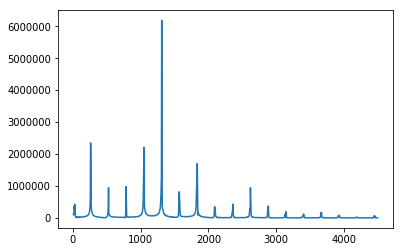

In [60]:
_, data1 = getData(oboe)
_,data = get_middle(data1, 10000)


oboe_fft = scifft.fft(data)

oboe_freqs = scifft.fftfreq(len(data), d= 1.0/rate) 
oboe_fft2 = oboe_fft.copy()
oboe_fft2 = np.abs(oboe_fft2)
mask = np.logical_and(oboe_freqs>0, oboe_freqs < 4500)
plp.plot(oboe_freqs[mask], oboe_fft2[mask])

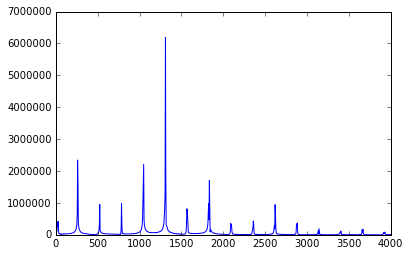

4) Let's use the powers of the harmonics relative to the power of the fundamental as features. This would be very easy if the fundamental were at  <i>exactly</i> 261.6 Hz and the harmonics were at <i>exact</i> integer multiples of 261.6 Hz. However, for several reasons, this is not the case. Really, in order to find the power of the fundamental, we need to look for the peak in the power array corresponding with frequencies <i>near</i> the fundamental (say +/- 10%). To find the power of the first harmonic, we need to look for the peak in the power array corresponding with frequencies near 2x the fundamental, say from 1.9x the fundamental to 2.1x the fundamental; etc... 

Write a function <tt>getNHarmonics(f,p,fundamental,N)</tt> that returns a Numpy array of the powers of each of the first <tt>N</tt> harmonics relative to the power of the fundamental. I suggest the following algorithm (although you're welcome to go rogue at your own risk):
<ol>
<li>For each integer multiple of the <tt>fundamental</tt> from 1 to <tt>N</tt>+1:</li>
<ol>
<li>determine the range of frequencies in which to look for the harmonic (within +/- 10% of the fundamental),</li>
<li>extract the powers corresponding with this range of frequencies, and</li>
<li>append the maximum of these powers to a list.</li>
</ol>
<li>Extract the first element of the list. This is the power of the fundamental.</li>
<li>Convert the remainder of the list (from indices 2 to N) to a Numpy array. These are the powers of the harmonics.</li>
<li>Normalize the Numpy array of harmonic powers by the power of the fundamental.</li>
<li>Return the result.</li>
</ol>

Use your function to extract the first N = 10 harmonics from one of your sound files. Make sure your function returns an array with 10 numbers, and that these relative amplitudes correspond with what you see in your plot.

In [64]:
def getNHarmonics(f,fft, N):
    powerList = []
    for i in range(1, N+1):
        mult_freq = i+1
        min_mult = mult_freq - 0.1
        max_mult = mult_freq + 0.1
        freq_funda = 261.6
        mask = np.logical_and(freq_funda*min_mult < f, f< freq_funda*max_mult)
        freq_harm = f[mask]
        power_harm = fft[mask]
        powerList.append(max(power_harm))
    power_of_fund = powerList[0]
    power_of_harm = np.array(powerList[1:])
    return np.linalg.norm(power_of_harm, power_of_fund)
print getNHarmonics(oboe_freqs, oboe_fft2, 10)

inf


C:\Users\Lenovo\Anaconda2\lib\site-packages\numpy\linalg\linalg.py:2216: RuntimeWarning: overflow encountered in power
  absx **= ord


[ 0.40467489  0.41855359  0.94119903  2.63812102  0.34823276  0.72495687
  0.15118413  0.184483    0.402618    0.15837615]


5) OK, it's time to put this all together. Write a function <tt>getFeatures(filename)</tt> that loads a sound file, extracts the middle 3000 samples (different from before) from the data, takes the FFT of that data, and returns a Numpy array of the powers of the first 10 harmonics (above the fundamental) relative to the power of the fundamental. Note that because we are using only the middle 3000 samples, the relative powers will be a little different from when we were using the middle 10000 samples.

[ 5.34869487  3.11749731  0.31555384  2.09895526  0.76837095  1.45747892
  0.90372166  1.21052907  1.37293698  0.76117059]


6) Complete the following code by entering the paths of the folders containing your trumpet and oboe sound files. If your <tt>getFeatures</tt> function works as it should, running this cell should load all your data and targets. 

In [9]:
import os
fd = ["C:\Users\Matt\Dropbox (Personal)\UCLA\Teaching\PIC 16\Exam\Samples\Trumpet\Wav", 
      "C:\Users\Matt\Dropbox (Personal)\UCLA\Teaching\PIC 16\Exam\Samples\Oboe\Wav"]
files = os.listdir(fd[0])
files = [fd[0] + "\\" + file for file in files]

data = []
target = []
for i in range(2):
    files = os.listdir(fd[i])
    files = [fd[i] + "\\" + file for file in files]
    for file in files:
        target.append(i) 
        data.append(getFeatures(file))
data = np.array(data)
target = np.array(target)

7) Train a <tt>LinearSVC</tt> using only the first and last observations (one trumpet file and one oboe file). Test using the remainder of the data and calculate the accuracy, which should be 100%.

The accuracy was: 1.0
